# LangChain: Q&A over Documents

An example might be a tool that would allow you to query a product catalog for items of interest.

In [1]:
import openai
import langchain
#import jq

In [2]:
#!conda install jq
#!pip install docarray

In [3]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

In [5]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import CSVLoader , JSONLoader , OnlinePDFLoader , S3FileLoader , PyMuPDFLoader , UnstructuredAPIFileLoader , WhatsAppChatLoader
from langchain.vectorstores import DocArrayInMemorySearch
from IPython.display import display, Markdown
from langchain.llms import OpenAI


In [8]:
OpenAI(model= 'text-davinci-003',temperature=0.0,max_tokens=2000)

OpenAI(cache=None, verbose=False, callbacks=None, callback_manager=None, client=<class 'openai.api_resources.completion.Completion'>, model_name='text-davinci-003', temperature=0.0, max_tokens=2000, top_p=1, frequency_penalty=0, presence_penalty=0, n=1, best_of=1, model_kwargs={}, openai_api_key=None, openai_api_base=None, openai_organization=None, openai_proxy=None, batch_size=20, request_timeout=None, logit_bias={}, max_retries=6, streaming=False, allowed_special=set(), disallowed_special='all')

In [5]:
path = 'edited.json'
#loader = JSONLoader(file_path=path,jq_schema='.key[].text')
import json
from pathlib import Path
from pprint import pprint


file_path='edited.json'
data = json.loads(Path(path).read_text())

In [6]:
data

{'user_id': '6dae740a-4bee-4773-9117-0082d4ebb62e',
 'doc_id': 'e4236bb48b91ea3c3d584240fa552342',
 'text_extracted_data_total_pages': 35,
 'text_extracted_data_page_content': [[{'index': 0,
    'value': 'e copy Va eage Dase el Apr ac'},
   {'index': 1, 'value': 'TROLLER'},
   {'index': 2, 'value': 'TROLLFJORD'},
   {'index': 3, 'value': '24K Overhaul ME2 PAAE316466'},
   {'index': 4, 'value': 'Order no:'},
   {'index': 5, 'value': '10983434'},
   {'index': 6, 'value': 'SWR no:'},
   {'index': 7, 'value': 'SWR-000260719'},
   {'index': 8, 'value': 'Work started :'},
   {'index': 9, 'value': '23.10.2019'},
   {'index': 10, 'value': 'Work ended :'},
   {'index': 11, 'value': '6.11.2019'},
   {'index': 12, 'value': 'Work location :'},
   {'index': 13, 'value': 'Fosen Yard'},
   {'index': 14, 'value': 'Performed by:'},
   {'index': 15, 'value': 'Asbjorn Stolen, Thomas Stenseth,'},
   {'index': 16, 'value': 'Espen Mjanes, John Martin Selle, Piotr'},
   {'index': 17, 'value': 'Dlugosz, Dariu

In [7]:
# loader = JSONLoader(
#     file_path = 'edited.json',
#     jq_schema='.messages[].content')

# data = loader.load()

In [7]:
path = 'input/Wartsilla/SWR-000349841_Check of engine automation system alarms_External.pdf'

loader = PyMuPDFLoader(path)
pages = loader.load_and_split()

In [9]:
pages

[Document(page_content='TROLLFJORD\nCheck of engine automation system alarms\nOrder no:\n11202751\nSWR no:\nSWR-000349841\nWork started :\n11-Aug-22\nWork ended :\n12-Aug-22\nWork location :\nBergen,NO\nPerformed by:\nJari Tegelberg\nReported by:\nJari Tegelberg\nReport date:\n14-Aug-22\nOffline copy downloaded from Wärtsilä Technical Knowledge Base 27 Apr 2023 by jacob.abonde_external@wartsila.com ,', metadata={'source': 'input/Wartsilla/SWR-000349841_Check of engine automation system alarms_External.pdf', 'file_path': 'input/Wartsilla/SWR-000349841_Check of engine automation system alarms_External.pdf', 'page': 0, 'total_pages': 8, 'format': 'PDF 1.7', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': 'Telerik RadRichTextBox', 'producer': 'pdf-lib (https://github.com/Hopding/pdf-lib)', 'creationDate': "D:20220815080008+02'00'", 'modDate': 'D:20230427113753Z', 'trapped': ''}),
 Document(page_content='© Wärtsilä 2022\nTable of contents\nDisclaimer\n3\nOrder\n3\nScope

In [ ]:
S3FileLoader()

VectorstoreIndexCreator is just a wrapper around all this logic. It is configurable in the text splitter it uses, the embeddings it uses, and the vectorstore it uses.

    1. Splitting documents into chunks

    2. Creating embeddings for each document

    3. Storing documents and embeddings in a vectorstore
    
    index_creator = VectorstoreIndexCreator(
    vectorstore_cls=Chroma, 
    embedding=OpenAIEmbeddings(),
    text_splitter=CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
    )
    index = index_creator.from_loaders([loader])
    response = index.query("What is the Engine type for Engine # PAAE316465?")

In [8]:
from langchain.indexes import VectorstoreIndexCreator

In [9]:
# One step to create index and ask question , full code mentioned just above
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch
).from_loaders([loader])

In [ ]:
# Asking the Question
response = index.query("What is the Engine type for Engine # PAAE316465?")

In [ ]:
display(Markdown(response))

In [ ]:
# Asking the Question with LLM - format 2
llm = ChatOpenAI(temperature = 0.0)
response = index.query("What is the Engine type for Engine # PAAE316465?",llm=llm)

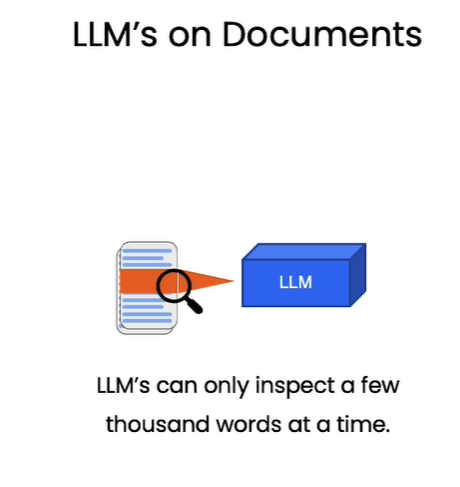


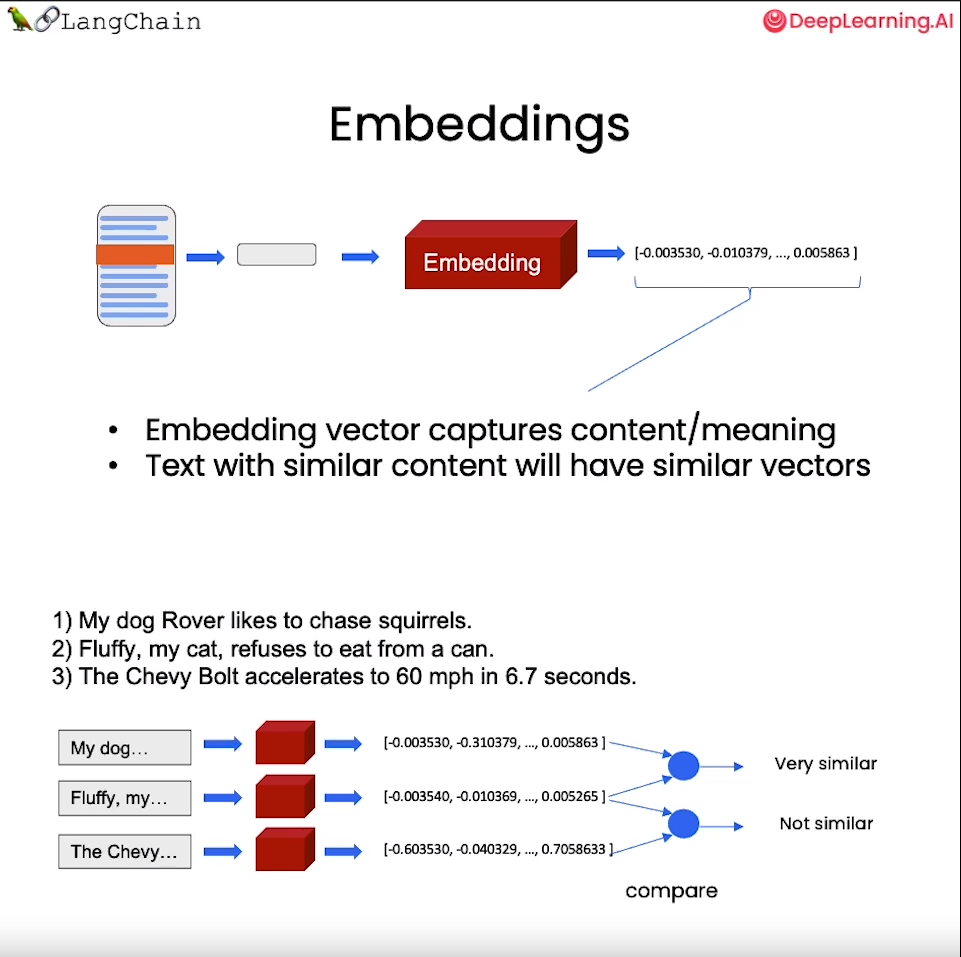


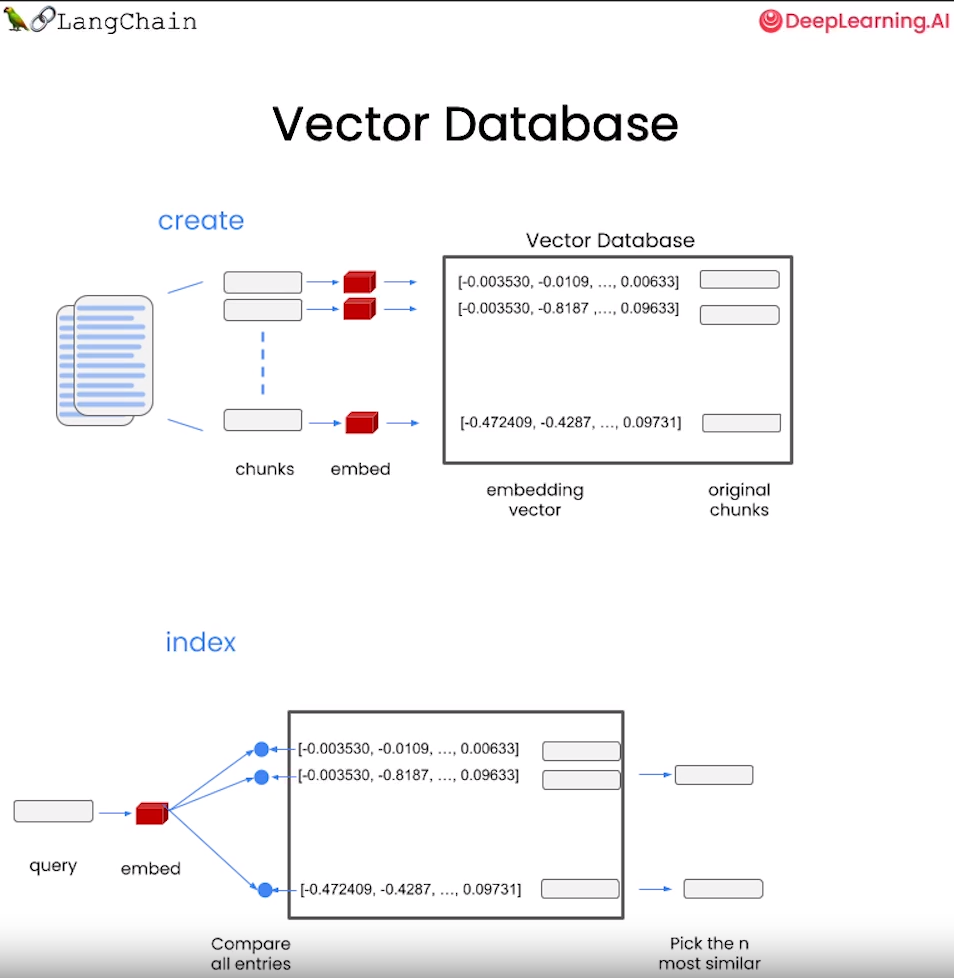

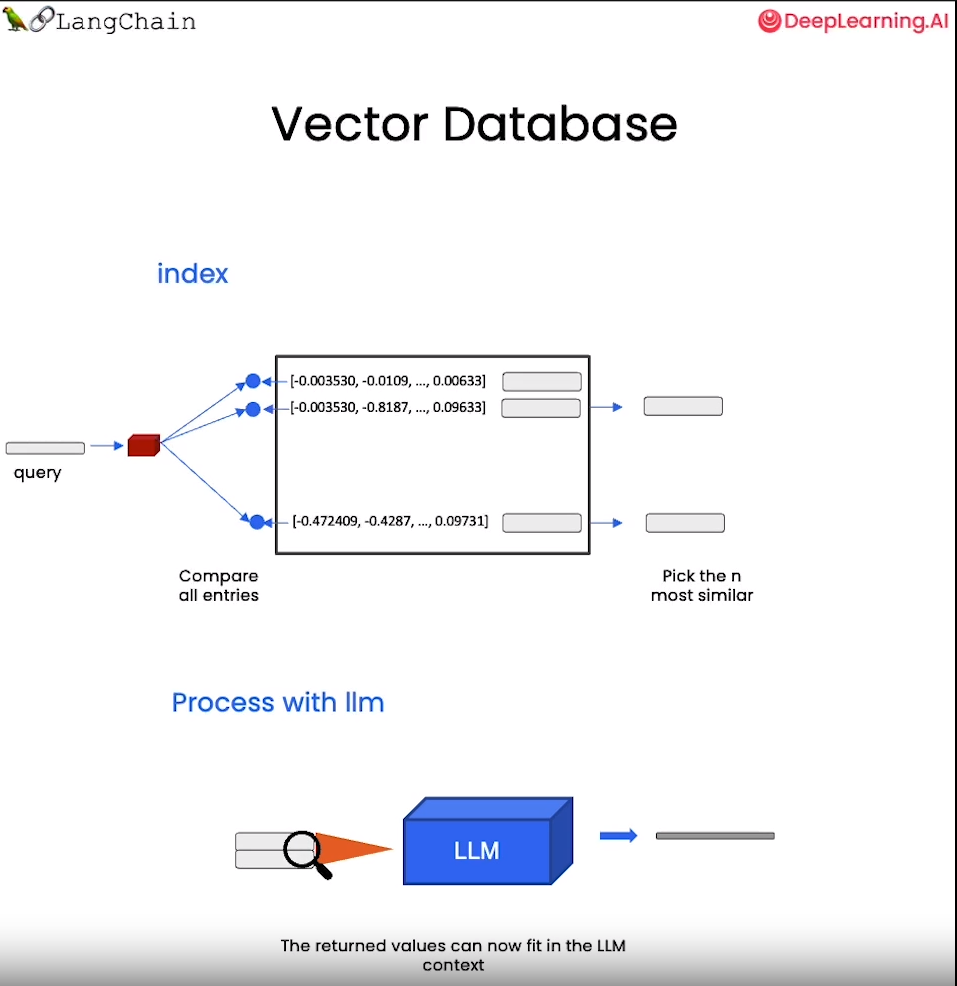

In [9]:
# Step 0 : Loading the document
docs = loader.load()

In [13]:
docs

[Document(page_content='TROLLFJORD\nCheck of engine automation system alarms\nOrder no:\n11202751\nSWR no:\nSWR-000349841\nWork started :\n11-Aug-22\nWork ended :\n12-Aug-22\nWork location :\nBergen,NO\nPerformed by:\nJari Tegelberg\nReported by:\nJari Tegelberg\nReport date:\n14-Aug-22\nOffline copy downloaded from Wärtsilä Technical Knowledge Base 27 Apr 2023 by jacob.abonde_external@wartsila.com , \n', metadata={'source': 'input/Wartsilla/SWR-000349841_Check of engine automation system alarms_External.pdf', 'file_path': 'input/Wartsilla/SWR-000349841_Check of engine automation system alarms_External.pdf', 'page': 0, 'total_pages': 8, 'format': 'PDF 1.7', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': 'Telerik RadRichTextBox', 'producer': 'pdf-lib (https://github.com/Hopding/pdf-lib)', 'creationDate': "D:20220815080008+02'00'", 'modDate': 'D:20230427113753Z', 'trapped': ''}),
 Document(page_content='© Wärtsilä 2022\nTable of contents\nDisclaimer\n3\nOrder\n3\nSc

In [2]:
# Step 1 : Split the documents

In [1]:
# Step 2 : Creating Embedding -> OpenAIEmbeddings (text-embedding-ada-002)
from langchain.embeddings import OpenAIEmbeddings
embeddings = OpenAIEmbeddings()

ValidationError: 1 validation error for OpenAIEmbeddings
__root__
  Did not find openai_api_key, please add an environment variable `OPENAI_API_KEY` which contains it, or pass  `openai_api_key` as a named parameter. (type=value_error)

In [12]:
embed = embeddings.embed_query("Hi my name is Sumit")
print(len(embed))
print(embed[:5])

1536
[-0.000247408781433478, 0.0017146189929917455, -0.016989003866910934, -0.014910288155078888, -0.027793187648057938]


In [14]:
# Step 3:  create the vectorstore to use as the index : -> DocArrayInMemorySearch
db = DocArrayInMemorySearch.from_documents(
    docs, 
    embeddings
)

#  that’s creating the index. Then, we expose this index in a retriever interface .

Retrying langchain.embeddings.openai.embed_with_retry.<locals>._embed_with_retry in 4.0 seconds as it raised APIConnectionError: Error communicating with OpenAI: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')).


In [ ]:
# Saving the index
db.save_local("faiss_index")

In [ ]:
# Loading index
new_db = FAISS.load_local("faiss_index", embed) # Vector Store - FAISS 

In [ ]:
# Merging two index
db1 = FAISS.from_texts(["foo"], embeddings)
db2 = FAISS.from_texts(["bar"], embeddings)

db1.merge_from(db2)
db1.docstore._dict # Now db1 contains both db1 and db2

In [15]:
query = "What is the Engine type for Engine # PAAE316465?"

In [16]:
# Step 3.1 : 
docs = db.similarity_search(query)

In [17]:
len(docs)

4

In [27]:
docs

[Document(page_content='Service Work Report\nTROLLFJORD - SWR-000349841 - Check of alarms\n© Wärtsilä 2022\n4\nScope of work\nItem\nDescription\nSpecific information\n0010\nCheck of alarms\nOMD-unit local alarms and UNIC alarms\nSpare parts\nItem no\nSPN\nDescription\nQuantity\nEngine\ntype\nProduct no\nEngine details and running hours\nEngine #\nNickname\nEngine\ntype\nNominal\nspeed\n(rpm)\nNominal\npower\n(kW)\nRotation\ndirection\nRunning\nhours\nDate\nPAAE316465 ME1\nW9L32\n750\n4140\n28287\n12.08.2022\nPAAE316466 ME2\nW9L32\n750\n4140\n28348\n12.08.2022\nOffline copy downloaded from Wärtsilä Technical Knowledge Base 27 Apr 2023 by jacob.abonde_external@wartsila.com , \n', metadata={'source': 'input/Wartsilla/SWR-000349841_Check of engine automation system alarms_External.pdf', 'file_path': 'input/Wartsilla/SWR-000349841_Check of engine automation system alarms_External.pdf', 'page': 3, 'total_pages': 8, 'format': 'PDF 1.7', 'title': '', 'author': '', 'subject': '', 'keywords': ''

In [20]:
# Step 3.2 : Loading Model
llm = ChatOpenAI(temperature = 0.0)

In [21]:
# Step 3.3 : Joining output of Step 3.1 
qdocs = "".join([docs[i].page_content for i in range(len(docs))])

In [25]:
# Step 3.4 : Asking Question
response = llm.call_as_llm(f"{qdocs} Question: Please list all your \
 Engine type for Engine # PAAE316465 and PAAE316466 in a table in markdown and summarize each one.") 


In [26]:
display(Markdown(response))

| Engine # | Nickname | Engine type | Nominal speed (rpm) | Nominal power (kW) | Rotation direction | Running hours | Date       |
|---------|----------|-------------|---------------------|---------------------|---------------------|---------------|------------|
| PAAE316465 | ME1      | W9L32       | 750                 | 4140                | -                   | 28287         | 12.08.2022 |
| PAAE316466 | ME2      | W9L32       | 750                 | 4140                | -                   | 28348         | 12.08.2022 |

Engine # PAAE316465 and PAAE316466 are both W9L32 engine types with a nominal speed of 750 rpm and a nominal power of 4140 kW. The rotation direction is not specified. PAAE316465 has a running hour of 28287 and was last checked on 12.08.2022, while PAAE316466 has a running hour of 28348 and was also last checked on 12.08.2022.

In [29]:
response = llm.call_as_llm(f"{qdocs} Question: Please list all your \
Description for Item 0010 in markdown and summarize each one.") 

display(Markdown(response))

Description for Item 0010: Check of alarms

1. OMD-unit local alarms and UNIC alarms: The scope of work includes checking the alarms for the OMD-unit local and UNIC systems.

2. Fuel pump control on indication for external fuel pump: The technician observed that the fuel pump control on indication was active on the local display when ME2 was started and running. However, there were no wires connected to MCM-11-2 X43-7-8 (DO), and the control function was disabled from SW for ME1. The technician disabled fuel pump control for ME2 to get rid of the fuel pump control indication.

3. Remote control indication: The technician observed that the remote control indication was active for ME2.

4. Cylinder liner SF alarms: The technician observed that ME2 SF alarm was active for cylA8 and cyl A6, liner temp 2. In addition, cyl A3, liner temp 1 for ME1 also had an SF alarm.

The technician also did a software check for both main engines and found no parameter differences between the backup file and on-engine file.

In [ ]:
# Step 4 : expose this index in a retriever interface 
retriever = db.as_retriever()

In [30]:
# Step 5 : create a chain and use it to answer questions
llm = ChatOpenAI( model= 'gpt-3.5-turbo',temperature = 0.0)
qa_stuff = RetrievalQA.from_chain_type(
    llm=llm, 
    chain_type="stuff", 
    retriever=retriever, 
    verbose=True
)

In [33]:
# Step 6 : Asking the Question
query =  "Please extract Description section \
in markdown and summarize each one."

response = qa_stuff.run(query)

display(Markdown(response))



> Entering new RetrievalQA chain...

> Finished chain.


## Description of work

- The scope of work was to check the OMD-unit local alarms and UNIC alarms.
- The spare parts used were not specified in this section.
- The engine details and running hours were provided for Engine #1 and Engine #2.
- The report mentions that cylinder liner SF alarms have been an issue for a longer time period and suggests evaluating the possibility of re-routing the cabling or installing protection support on sharp edges to avoid possible cabling damages.
- The report also mentions that during the check, the OMD-unit was in normal state and there were no active alarms. Historical data was collected to further investigate the OMD failure and alarms.

    Document Loader - CSVLoader , JSONLoader , OnlinePDFLoader , S3FileLoader , PyMuPDFLoader , UnstructuredAPIFileLoader
    Split the documents -  tiktokens
    Embeddings - OpenAIEmbeddings
    Vectorstores  - FAISS
    LLM - OpenAI(text-davinci-003,temperature = 0.0) / ChatOpenAI(model= 'gpt-3.5-turbo',temperature = 0.0)


In [ ]:
# Using the index created on initial of notebook to query
response = index.query(query, llm=llm)

In [ ]:
# Combination of Step 1  to step 5 => VectorstoreIndexCreator
index = VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch,
    embedding=embeddings,
).from_loaders([loader])

response = index.query(query, llm=llm)

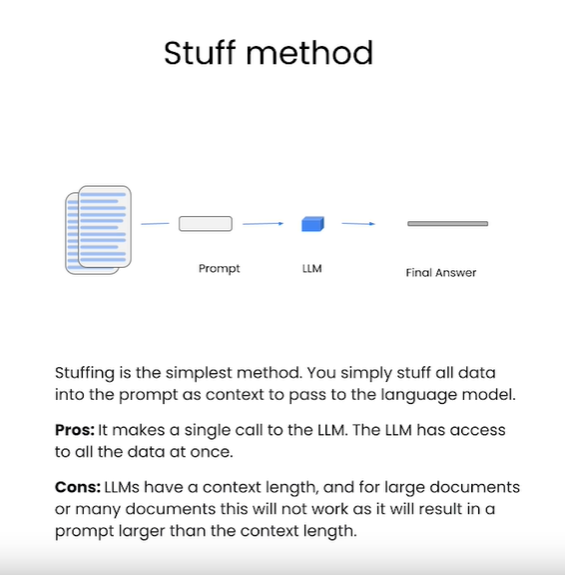

0. #### Stuff - Easy , Simple , Low cost but less efficient

# For big documents or multiple documents ::

1. #### Map Reduce

    It takes all the chunks of text and passes them along with the questions to th LLM and get back the response . Then it use anathor LLM to summarize all the individual responses into the final answer.

    [Pros] : 
            This can operate over any number of documents.
            Most powerful . 
            Do individual question parallel.

    [Cons]: 
            Costly and longer Response
            It treats all the documents or chunks of text as indpendent from each other ,which may not be the case all time

    **Eg. Summarization**

2. #### Refine 

    It acts as iteratively. It builds upon the answer of previous documents. Its good in combine the answer and build up solution over time. 

3. #### Map_Rerank

    You do a single call to LLM for each document and aslo ask for a score  and you selct the highest score. 
    
    [Cons]: 
            Expensive
            Experimental
            need to tell the highest score


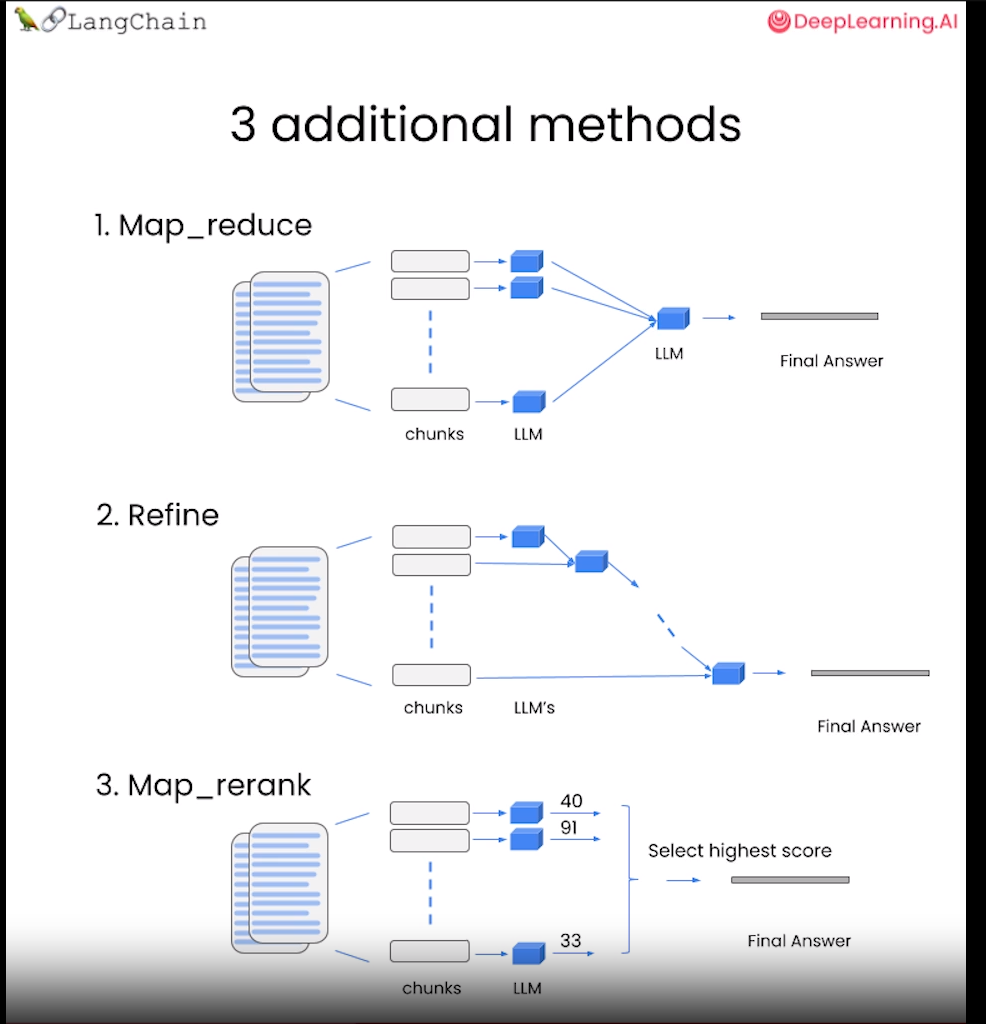